# Stackoverflow Dev Career

### Background

The field of data and engineering is very broad. There is a wide range of skills to learn and new tools always emerging. The overall purpose of this notebook is to explore the data set with a focus on US devs:

- What is a typical US full time dev profile? 
    - demographics
    - tools used
    - salary
- Segment and see if patterns emerge 
    - experience 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Load and Review Data

In [3]:
df_2022 = pd.read_csv('files/2022 Stack Overflow Survey Results.csv')

In [4]:
df_2022.shape

(73268, 79)

In [5]:
df_2022.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,nan
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.00
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.00
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,nan


In [6]:
df_2022.describe().T

,count,mean,std,min,25%,50%,75%,max
ResponseId,73268.00,36634.50,21150.79,1.00,18317.75,36634.50,54951.25,73268.00
CompTotal,38422.00,23424340221747959297504942608856691548764873498...,45914781878161738872227058510324868731367416738...,0.00,30000.00,77500.00,154000.00,90000000000000006093448009035034248110033526180...
VCHostingPersonal use,0.00,nan,nan,nan,nan,nan,nan,nan
VCHostingProfessional use,0.00,nan,nan,nan,nan,nan,nan,nan
WorkExp,36769.00,10.24,8.71,0.00,4.00,8.00,15.00,50.00
ConvertedCompYearly,38071.00,170761.28,781413.24,1.00,35832.00,67845.00,120000.00,50000000.00


### Grab interested columns and filter for country US, FTE, and set a minimum Salary

In [7]:
cols = ['Employment','MainBranch','EdLevel','Country','ConvertedCompYearly','YearsCode','LearnCodeCoursesCert','LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith'
        ,'WebframeHaveWorkedWith','MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith'
        ,'OpSysProfessional use','VersionControlSystem','OfficeStackSyncHaveWorkedWith','Age','Gender','Trans','Sexuality'
        ,'Ethnicity','Accessibility','MentalHealth','WorkExp','DevType']

In [8]:
df_clean = df_2022[cols]

In [9]:
df_clean = df_clean[df_clean['Country']=='United States of America']

In [10]:
df_clean['Employment'].value_counts()

Employed, full-time                                                                                                                                                                                                     9614
Student, full-time                                                                                                                                                                                                       949
Independent contractor, freelancer, or self-employed                                                                                                                                                                     606
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 503
Not employed, but looking for work                                                                                  

- Since I'm only interested in FTE, I'll grab both Employed, full-time and Employed, full-time;Independent contractor, freelancer, or self-employed
- Independent contractor, freelancer, or self-employed  doesn't mention if FT or PT so I won't include
- "Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time" is not clear to me so I'll exlude these and similar
- Also excluded are full time students and full time employed. 

In [11]:
df_clean = df_clean[(df_clean['Employment']=='Employed, full-time') | (df_clean['Employment']=='Employed, full-time;Independent contractor, freelancer, or self-employed')]

In [12]:
df_clean['Employment'].value_counts()

Employed, full-time                                                         9614
Employed, full-time;Independent contractor, freelancer, or self-employed     503
Name: Employment, dtype: int64

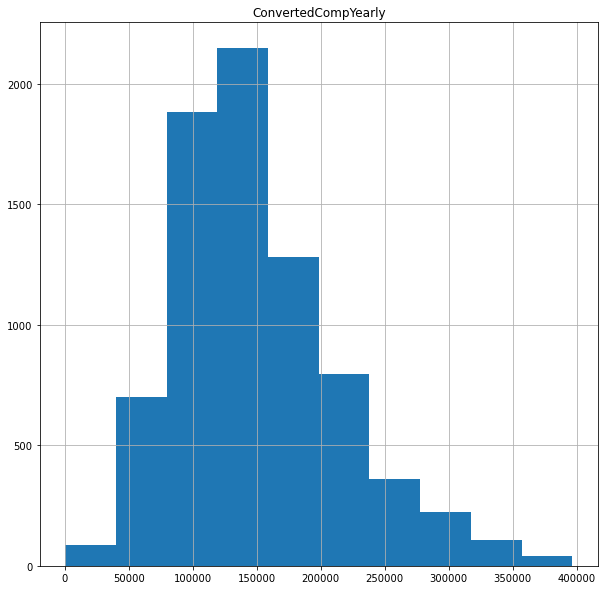

In [13]:
#ConvertedCompYearly very skewed so lets remove upper ends
df_clean[df_clean['ConvertedCompYearly']<400000].hist(column='ConvertedCompYearly',stacked=False, bins=10, figsize=(10, 10));

In [14]:
df_clean['ConvertedCompYearly'].sort_values(ascending=False)

62026   35000000.00
62223   22500000.00
18922   22500000.00
66495   18000000.00
1290    15000000.00
            ...    
73229           nan
73240           nan
73254           nan
73264           nan
73265           nan
Name: ConvertedCompYearly, Length: 10117, dtype: float64

In [15]:
df_clean[df_clean['ConvertedCompYearly']<50000].shape[0]/df_clean.shape[0]

0.014529999011564694

In [16]:
df_clean[df_clean['ConvertedCompYearly']<50000].describe().T

,count,mean,std,min,25%,50%,75%,max
ConvertedCompYearly,147.00,28489.56,17739.27,1.00,10250.00,35000.00,44000.00,49500.00
WorkExp,100.00,9.74,9.57,1.00,3.00,6.00,10.25,40.00


In [17]:
df_clean[df_clean['ConvertedCompYearly']>400000].shape[0]/df_clean.shape[0]

0.061282989028368096

In [18]:
df_clean[df_clean['ConvertedCompYearly']>400000].describe().T

,count,mean,std,min,25%,50%,75%,max
ConvertedCompYearly,620.00,3272963.65,3504020.64,401600.00,825000.00,1800000.00,5000000.00,35000000.00
WorkExp,398.00,12.83,9.54,0.00,5.25,10.00,18.75,46.00


- FTE US Devs making <50k represent 1.5% of data and >400k represent 6.1%. I'm ok dropping since my focus is understanding the mid - high end ranges

In [19]:
df_clean = df_clean[(df_clean['ConvertedCompYearly']>=50000) & (df_clean['ConvertedCompYearly']<=400000)]

In [20]:
df_clean.shape

(7524, 26)

In [21]:
df_clean.isnull().sum()

Employment                          0
MainBranch                          0
EdLevel                             0
Country                             0
ConvertedCompYearly                 0
YearsCode                          10
LearnCodeCoursesCert             5077
LanguageHaveWorkedWith             13
DatabaseHaveWorkedWith           1026
PlatformHaveWorkedWith           1572
WebframeHaveWorkedWith           1726
MiscTechHaveWorkedWith           2793
ToolsTechHaveWorkedWith          1499
NEWCollabToolsHaveWorkedWith       43
OpSysProfessional use             222
VersionControlSystem                4
OfficeStackSyncHaveWorkedWith     122
Age                                25
Gender                             39
Trans                              46
Sexuality                         217
Ethnicity                          97
Accessibility                     228
MentalHealth                      256
WorkExp                          2141
DevType                             2
dtype: int64

In [22]:
df_clean['ConvertedCompYearly'].describe()

count     7524.00
mean    151857.71
std      64993.73
min      50000.00
25%     105000.00
50%     140000.00
75%     180000.00
max     400000.00
Name: ConvertedCompYearly, dtype: float64

In [23]:
df_clean.head()

,Employment,MainBranch,EdLevel,Country,ConvertedCompYearly,YearsCode,LearnCodeCoursesCert,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,...,OfficeStackSyncHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,WorkExp,DevType
11,"Employed, full-time;Independent contractor, fr...","I am not primarily a developer, but I write co...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,194400.00,12,NaN,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Couchbase;CouchDB;Microsoft SQL Server;MongoDB...,AWS;Microsoft Azure,...,Cisco Webex Teams;Google Chat;Microsoft Teams;...,35-44 years old,Man,No,Straight / Heterosexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",14.00,Engineering manager
12,"Employed, full-time",I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,65000.00,12,NaN,C;HTML/CSS;Rust;SQL;Swift;TypeScript,PostgreSQL,AWS,...,Microsoft Teams;Slack;Zoom,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,5.00,"Developer, full-stack"
14,"Employed, full-time;Independent contractor, fr...",I am a developer by profession,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United States of America,110000.00,11,NaN,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,Elasticsearch;MongoDB;Neo4j;PostgreSQL,AWS;DigitalOcean;Heroku,...,Microsoft Teams;Slack;Zoom,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,5.00,"Developer, full-stack;Academic researcher;DevO..."
26,"Employed, full-time",I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,106960.00,10,NaN,Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;SQL,MongoDB;MySQL,AWS,...,Microsoft Teams;Slack;Zoom,25-34 years old,Man,No,Straight / Heterosexual,White;North American,None of the above,None of the above,nan,"Developer, full-stack;Developer, back-end"
28,"Employed, full-time",I am a developer by profession,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United States of America,130000.00,20,NaN,C;C++,NaN,NaN,...,Microsoft Teams,35-44 years old,Man,No,Straight / Heterosexual,Prefer not to say,None of the above,None of the above,14.00,"Developer, desktop or enterprise applications;..."


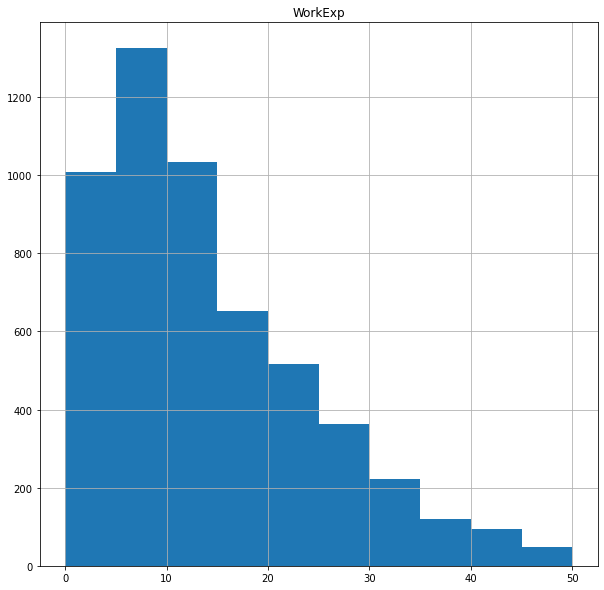

In [24]:
df_clean.hist(column='WorkExp',stacked=False, bins=10, figsize=(10, 10));

In [25]:
df_clean['WorkExp'].describe().T

count   5383.00
mean      13.43
std       10.10
min        0.00
25%        6.00
50%       10.00
75%       20.00
max       50.00
Name: WorkExp, dtype: float64

### Fix Data Types

In [26]:
df_clean.dtypes

Employment                        object
MainBranch                        object
EdLevel                           object
Country                           object
ConvertedCompYearly              float64
YearsCode                         object
LearnCodeCoursesCert              object
LanguageHaveWorkedWith            object
DatabaseHaveWorkedWith            object
PlatformHaveWorkedWith            object
WebframeHaveWorkedWith            object
MiscTechHaveWorkedWith            object
ToolsTechHaveWorkedWith           object
NEWCollabToolsHaveWorkedWith      object
OpSysProfessional use             object
VersionControlSystem              object
OfficeStackSyncHaveWorkedWith     object
Age                               object
Gender                            object
Trans                             object
Sexuality                         object
Ethnicity                         object
Accessibility                     object
MentalHealth                      object
WorkExp         

- a few columns should be numeric

In [27]:
df_clean['Age'].sample(10)

46043    25-34 years old
51053    35-44 years old
15317    25-34 years old
39846    35-44 years old
66722    25-34 years old
16203    18-24 years old
14117    45-54 years old
11378    18-24 years old
11365    25-34 years old
53585    25-34 years old
Name: Age, dtype: object

In [28]:
df_clean['YearsCode'].sample(10)

51915    25
39905     9
14002     7
38403    20
63978    24
23399    21
14315     7
14949     8
64095    20
39525     8
Name: YearsCode, dtype: object

In [29]:
df_clean['WorkExp'].sample(10)

38703     nan
24184   30.00
21578     nan
56954    2.00
40510    5.00
23043     nan
70340    5.00
39258     nan
13404     nan
11080     nan
Name: WorkExp, dtype: float64

- Age: we can either leave as is or recatorgize as numeric by taking median. Better to leave as is.
- Years code: good to convert to numeric
- WorkExp: good to convert to numeric

In [30]:
df_clean['YearsCode'] = pd.to_numeric(df_clean['YearsCode'], errors='coerce')
df_clean['WorkExp'] = pd.to_numeric(df_clean['WorkExp'], errors='coerce')

In [31]:
df_clean.isnull().sum()

Employment                          0
MainBranch                          0
EdLevel                             0
Country                             0
ConvertedCompYearly                 0
YearsCode                          37
LearnCodeCoursesCert             5077
LanguageHaveWorkedWith             13
DatabaseHaveWorkedWith           1026
PlatformHaveWorkedWith           1572
WebframeHaveWorkedWith           1726
MiscTechHaveWorkedWith           2793
ToolsTechHaveWorkedWith          1499
NEWCollabToolsHaveWorkedWith       43
OpSysProfessional use             222
VersionControlSystem                4
OfficeStackSyncHaveWorkedWith     122
Age                                25
Gender                             39
Trans                              46
Sexuality                         217
Ethnicity                          97
Accessibility                     228
MentalHealth                      256
WorkExp                          2141
DevType                             2
dtype: int64

### Feature Engineering and EDA
Many data points contain lists of items. We can convert to n_items which might give us insight to quantitiy of metrics. 
EG: LanguageHaveWorkedWith-> C++;Python;VBA	-> 3

In [32]:
cols_n = []

In [33]:
#convert string data to counts
df_clean['n_cert'] = df_clean['LearnCodeCoursesCert'].str.split(pat=";").str.len()
df_clean['n_lang'] = df_clean['LanguageHaveWorkedWith'].str.split(pat=";").str.len()
df_clean['n_db'] = df_clean['DatabaseHaveWorkedWith'].str.split(pat=";").str.len()
df_clean['n_platform'] = df_clean['PlatformHaveWorkedWith'].str.split(pat=";").str.len()
df_clean['n_webframe'] = df_clean['WebframeHaveWorkedWith'].str.split(pat=";").str.len()
df_clean['n_msic'] = df_clean['MiscTechHaveWorkedWith'].str.split(pat=";").str.len()
df_clean['n_vcs'] = df_clean['VersionControlSystem'].str.split(pat=";").str.len()
df_clean['n_officestack'] = df_clean['OfficeStackSyncHaveWorkedWith'].str.split(pat=";").str.len()
df_clean['n_devtitles'] = df_clean['DevType'].str.split(pat=";").str.len()

In [34]:
df_clean.head()

,Employment,MainBranch,EdLevel,Country,ConvertedCompYearly,YearsCode,LearnCodeCoursesCert,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,...,DevType,n_cert,n_lang,n_db,n_platform,n_webframe,n_msic,n_vcs,n_officestack,n_devtitles
11,"Employed, full-time;Independent contractor, fr...","I am not primarily a developer, but I write co...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,194400.00,12.00,NaN,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Couchbase;CouchDB;Microsoft SQL Server;MongoDB...,AWS;Microsoft Azure,...,Engineering manager,nan,7.00,7.00,2.00,5.00,8.00,1.00,6.00,1.00
12,"Employed, full-time",I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,65000.00,12.00,NaN,C;HTML/CSS;Rust;SQL;Swift;TypeScript,PostgreSQL,AWS,...,"Developer, full-stack",nan,6.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00
14,"Employed, full-time;Independent contractor, fr...",I am a developer by profession,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United States of America,110000.00,11.00,NaN,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,Elasticsearch;MongoDB;Neo4j;PostgreSQL,AWS;DigitalOcean;Heroku,...,"Developer, full-stack;Academic researcher;DevO...",nan,7.00,4.00,3.00,6.00,5.00,1.00,3.00,3.00
26,"Employed, full-time",I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States of America,106960.00,10.00,NaN,Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;SQL,MongoDB;MySQL,AWS,...,"Developer, full-stack;Developer, back-end",nan,6.00,2.00,1.00,1.00,nan,1.00,3.00,2.00
28,"Employed, full-time",I am a developer by profession,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United States of America,130000.00,20.00,NaN,C;C++,NaN,NaN,...,"Developer, desktop or enterprise applications;...",nan,2.00,nan,nan,nan,1.00,1.00,1.00,3.00


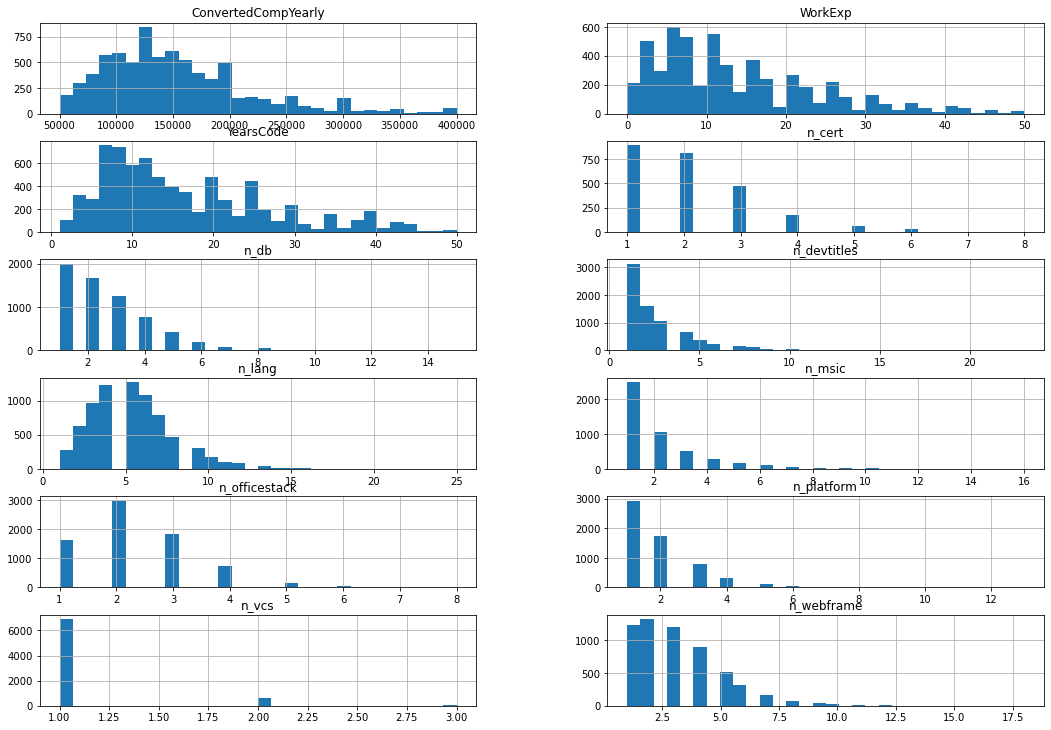

In [35]:
columns = list(df_clean) 
df_clean[columns].hist(stacked=False, bins=30, figsize=(18, 30), layout=(14, 2));

- ConvertedCompYearly right skewed. Need to explore a bit more

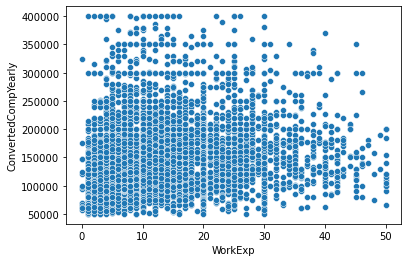

In [36]:
sns.scatterplot(data=df_clean, x="WorkExp", y="ConvertedCompYearly")

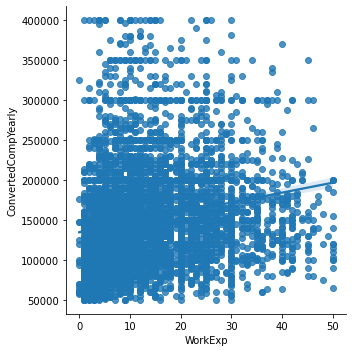

In [37]:
sns.lmplot(data=df_clean, x="WorkExp", y="ConvertedCompYearly");

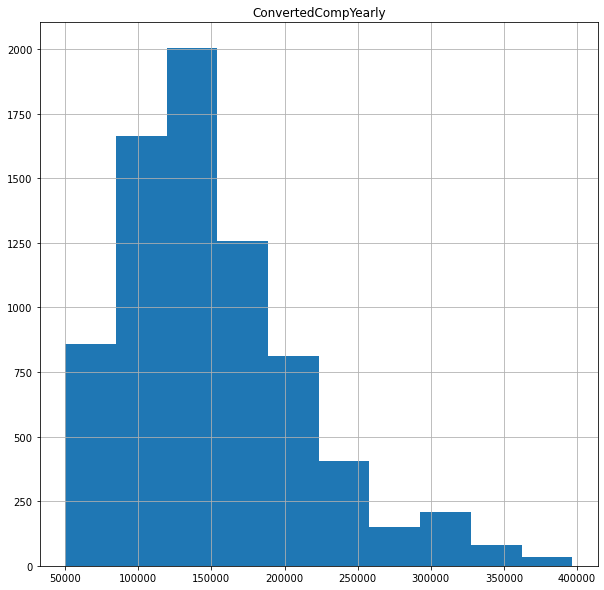

In [38]:
#ConvertedCompYearly very skewed so lets remove upper ends
df_clean[df_clean['ConvertedCompYearly']<400000].hist(column='ConvertedCompYearly',stacked=False, bins=10, figsize=(10, 10));

- vast majority of salaries are sub 250k

In [39]:
#lets split into 3 even-ish groups
pd.qcut(df_clean['ConvertedCompYearly'], 4).value_counts()

(49999.999, 105000.0]    1946
(105000.0, 140000.0]     1916
(180000.0, 400000.0]     1864
(140000.0, 180000.0]     1798
Name: ConvertedCompYearly, dtype: int64

In [40]:
def comp_four(row):
    if row['ConvertedCompYearly'] <= 100000:
        val = "<=100k"
    elif row['ConvertedCompYearly'] <= 150000:
        val = "<=150k"
    elif row['ConvertedCompYearly'] <= 200000:
        val = "<=200k"
    else:
        val = ">200k"
    return val

In [41]:
df_clean['CompGroupFour'] = df_clean.apply(comp_four, axis=1)

In [42]:
df_clean['CompGroupFour'].value_counts(dropna=False)

<=150k    2719
<=200k    1822
<=100k    1736
>200k     1247
Name: CompGroupFour, dtype: int64

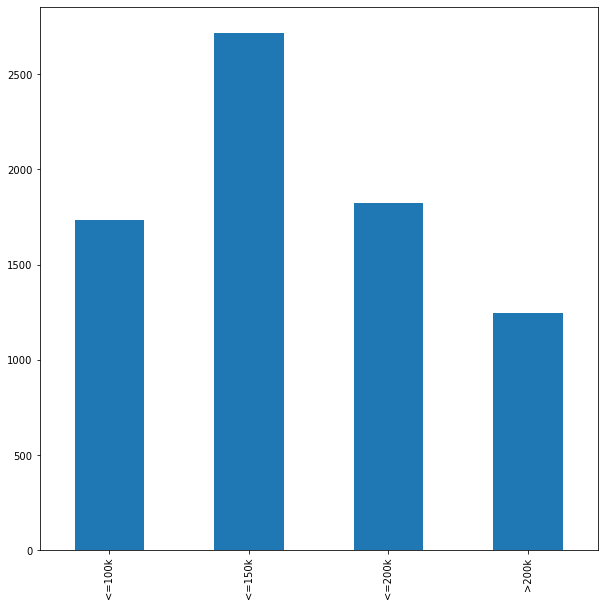

In [43]:
df_clean['CompGroupFour'].value_counts().loc[["<=100k","<=150k","<=200k",">200k"]].plot.bar(figsize=(10, 10));

- Most devs make between 100 and 150k. 
- we'll break this down futher to see what tools used by each group

In [44]:
df_clean['Age'].value_counts()

25-34 years old       3194
35-44 years old       2207
45-54 years old        923
18-24 years old        656
55-64 years old        426
65 years or older       72
Prefer not to say       20
Under 18 years old       1
Name: Age, dtype: int64

In [45]:
df_clean['Age'].value_counts()[["18-24 years old","25-34 years old","35-44 years old","45-54 years old"
                                ,"55-64 years old","65 years or older","Prefer not to say","Under 18 years old"]].reset_index()

,index,Age
0,18-24 years old,656
1,25-34 years old,3194
2,35-44 years old,2207
3,45-54 years old,923
4,55-64 years old,426
5,65 years or older,72
6,Prefer not to say,20
7,Under 18 years old,1


In [46]:
df_clean['Age'].value_counts(normalize=True)

25-34 years old      0.43
35-44 years old      0.29
45-54 years old      0.12
18-24 years old      0.09
55-64 years old      0.06
65 years or older    0.01
Prefer not to say    0.00
Under 18 years old   0.00
Name: Age, dtype: float64

- Most Devs in this data set are in the 25-34 range (43%)
- Second is 25-44 (29%)
- the rest of the values are not much

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE538E35B0>]],
      dtype=object)

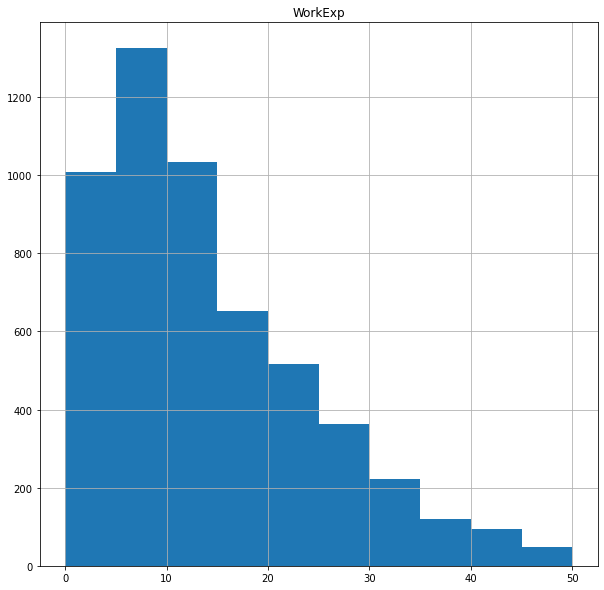

In [47]:
#ConvertedCompYearly very skewed so lets remove upper ends
df_clean.hist(column='WorkExp',stacked=False, bins=10, figsize=(10, 10))

In [48]:
pd.qcut(df_clean['WorkExp'], 10).value_counts()

(-0.001, 3.0]    714
(10.0, 14.0]     673
(3.0, 5.0]       608
(5.0, 7.0]       564
(17.0, 22.0]     529
(28.0, 50.0]     510
(14.0, 17.0]     489
(22.0, 28.0]     488
(7.0, 9.0]       448
(9.0, 10.0]      360
Name: WorkExp, dtype: int64

- for this project I'll use 4 groups
- new: 0-2yrs
- early career: 3-10
- mid: 11-20
- vet: 20+

In [49]:
def work_four(row):
    if row['WorkExp'] <= 2:
        val = "new"
    elif row['WorkExp'] <= 10:
        val = "early"
    elif row['WorkExp'] <= 20:
        val = "mid"
    else:
        val = "vet"
    return val

In [50]:
df_clean['WorkExpFour'] = df_clean.apply(work_four, axis=1)

In [51]:
df_clean['WorkExpFour'].value_counts()

vet      3288
early    2262
mid      1542
new       432
Name: WorkExpFour, dtype: int64

- new devs are not well represented
- survey completed by mostly those well into their careers

In [52]:
work_order = ['new','early','mid','vet']

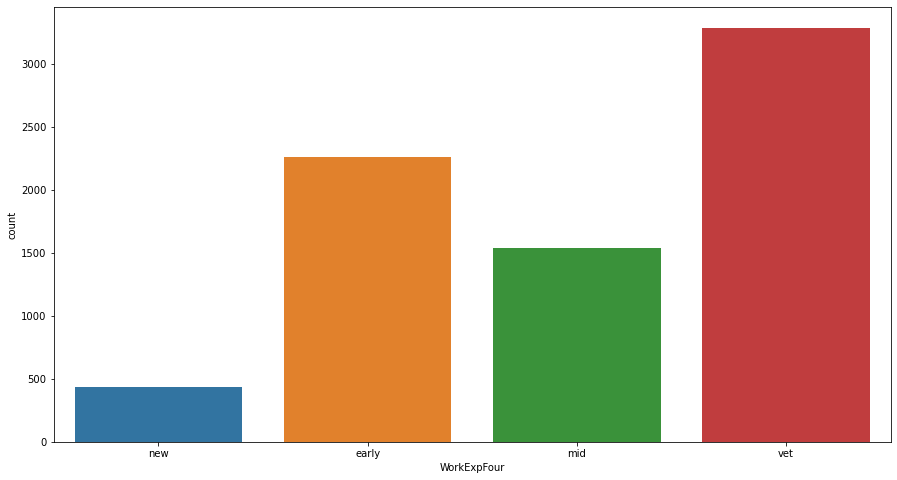

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(x=df_clean["WorkExpFour"],order=work_order);

### Qustion 1: What is a typical US full time dev profile

#### I created two functions for demographics and tools since I'll be reusing for futher questions

In [54]:
def demographics(df):
    demo_cols = ["Age","Gender","Trans","Sexuality","Ethnicity","Accessibility","MentalHealth"]
    print('Demogrpahic info:')
    for x in demo_cols:
        print("{0}: ".format(x))
        print(df_clean[x].value_counts(dropna=False,normalize=True))
        print("-" * 40)

In [55]:
def tools(df):
    tools_col = ['LearnCodeCoursesCert','LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith',
                'WebframeHaveWorkedWith','MiscTechHaveWorkedWith','VersionControlSystem','OfficeStackSyncHaveWorkedWith','DevType']
    tools_counts = ['n_cert','n_lang','n_db','n_platform','n_webframe','n_msic','n_vcs','n_officestack','n_devtitles']
    for x in range(9):
        print("Average Number of {}: {},".format(tools_col[x],round(df[tools_counts[x]].mean(),2)))
        print("Median Number of {}: {},".format(tools_col[x],round(df[tools_counts[x]].median(),2)))
        print("Top 5 {}:".format(tools_col[x]))
        print(pd.Series([item for sublist in df[df[tools_col[x]].notnull()][tools_col[x]].str.split(pat=";") for item in sublist]).value_counts().head(5))
        print("*"*40)

In [56]:
demographics(df_clean)

Demogrpahic info:
Age: 
25-34 years old      0.42
35-44 years old      0.29
45-54 years old      0.12
18-24 years old      0.09
55-64 years old      0.06
65 years or older    0.01
NaN                  0.00
Prefer not to say    0.00
Under 18 years old   0.00
Name: Age, dtype: float64
----------------------------------------
Gender: 
Man                                                                                  0.90
Woman                                                                                0.06
Non-binary, genderqueer, or gender non-conforming                                    0.01
Prefer not to say                                                                    0.01
Man;Non-binary, genderqueer, or gender non-conforming                                0.01
NaN                                                                                  0.01
Woman;Non-binary, genderqueer, or gender non-conforming                              0.00
Or, in your own words:              

In [57]:
tools(df_clean)

Average Number of LearnCodeCoursesCert: 2.11,
Median Number of LearnCodeCoursesCert: 2.0,
Top 5 LearnCodeCoursesCert:
Udemy          1405
Pluralsight     954
Codecademy      821
Coursera        729
Other           508
dtype: int64
****************************************
Average Number of LanguageHaveWorkedWith: 5.3,
Median Number of LanguageHaveWorkedWith: 5.0,
Top 5 LanguageHaveWorkedWith:
JavaScript    5135
SQL           4316
HTML/CSS      4061
Python        3594
Bash/Shell    3038
dtype: int64
****************************************
Average Number of DatabaseHaveWorkedWith: 2.6,
Median Number of DatabaseHaveWorkedWith: 2.0,
Top 5 DatabaseHaveWorkedWith:
PostgreSQL              3094
MySQL                   2348
Microsoft SQL Server    2229
Redis                   1762
SQLite                  1665
dtype: int64
****************************************
Average Number of PlatformHaveWorkedWith: 1.86,
Median Number of PlatformHaveWorkedWith: 2.0,
Top 5 PlatformHaveWorkedWith:
AWS       

In [58]:
typical_us_dev_demo = "The typical FTE US DEV is: a 25-34 years old man, non trans, White, Straight / Heterosexual. \nNo accessibility or mental heath needs reported."
typical_us_dev_tools = "Popular tools and tech used by FTE US devs: JS, SQL, HTML/CSS, Python, Bash/Shell, PostgresSQL, MySQL, MSSQL, \nAWS, Azure, Google Cloud, React.js,Node.js, JQuery, .NET, numpy, Pandas, Git, Slack, Zoom, Teams"

In [59]:
print(typical_us_dev_demo)

The typical FTE US DEV is: a 25-34 years old man, non trans, White, Straight / Heterosexual. 
No accessibility or mental heath needs reported.


In [60]:
print(typical_us_dev_tools)

Popular tools and tech used by FTE US devs: JS, SQL, HTML/CSS, Python, Bash/Shell, PostgresSQL, MySQL, MSSQL, 
AWS, Azure, Google Cloud, React.js,Node.js, JQuery, .NET, numpy, Pandas, Git, Slack, Zoom, Teams


### Part 2 - Segement groups by experience

In [61]:
df_clean['WorkExpFour'].value_counts()

vet      3288
early    2262
mid      1542
new       432
Name: WorkExpFour, dtype: int64

In [62]:
grp_new = df_clean[df_clean["WorkExpFour"]== 'new']
grp_early = df_clean[df_clean["WorkExpFour"]== 'early']
grp_mid = df_clean[df_clean["WorkExpFour"]== 'mid']
grp_vet= df_clean[df_clean["WorkExpFour"]== 'vet']

In [63]:
print(grp_new.shape)
print(grp_early.shape)
print(grp_mid.shape)
print(grp_vet.shape)

(432, 37)
(2262, 37)
(1542, 37)
(3288, 37)


In [64]:
grp_new.describe().T

,count,mean,std,min,25%,50%,75%,max
ConvertedCompYearly,432.00,106699.61,50830.41,50000.00,75000.00,90000.00,125000.00,400000.00
YearsCode,431.00,6.48,3.72,1.00,4.00,6.00,8.00,30.00
WorkExp,432.00,1.47,0.58,0.00,1.00,2.00,2.00,2.00
n_cert,174.00,2.06,1.06,1.00,1.00,2.00,3.00,5.00
n_lang,432.00,5.30,2.78,1.00,3.00,5.00,7.00,19.00
n_db,366.00,2.39,1.55,1.00,1.00,2.00,3.00,9.00
n_platform,317.00,1.89,1.03,1.00,1.00,2.00,2.00,6.00
n_webframe,336.00,3.18,1.88,1.00,2.00,3.00,4.00,12.00
n_msic,270.00,2.42,1.90,1.00,1.00,2.00,3.00,13.00
n_vcs,432.00,1.07,0.27,1.00,1.00,1.00,1.00,3.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE5314B400>]],
      dtype=object)

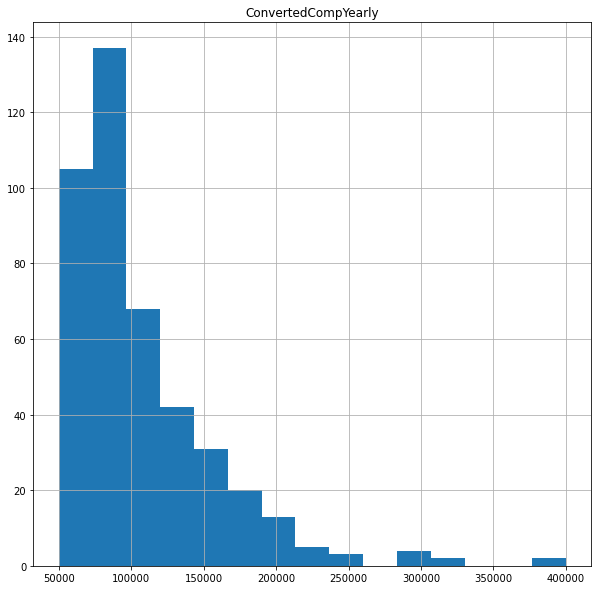

In [65]:
grp_new.hist(column='ConvertedCompYearly',stacked=False, bins=15, figsize=(10, 10))

In [66]:
grp_early.describe().T

,count,mean,std,min,25%,50%,75%,max
ConvertedCompYearly,2262.00,144347.08,62320.58,50000.00,100000.00,130000.00,171000.00,400000.00
YearsCode,2261.00,10.53,4.62,1.00,7.00,10.00,13.00,43.00
WorkExp,2262.00,6.47,2.33,3.00,4.00,6.00,8.00,10.00
n_cert,798.00,2.18,1.23,1.00,1.00,2.00,3.00,7.00
n_lang,2258.00,5.32,2.52,1.00,4.00,5.00,7.00,22.00
n_db,1956.00,2.58,1.55,1.00,1.00,2.00,3.00,11.00
n_platform,1817.00,1.85,1.08,1.00,1.00,2.00,2.00,13.00
n_webframe,1794.00,3.23,1.92,1.00,2.00,3.00,4.00,16.00
n_msic,1442.00,2.18,1.65,1.00,1.00,2.00,3.00,11.00
n_vcs,2261.00,1.07,0.26,1.00,1.00,1.00,1.00,3.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE538EA670>]],
      dtype=object)

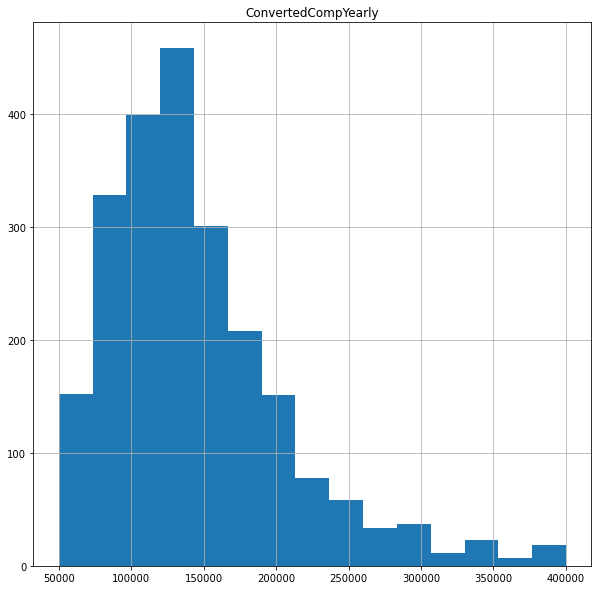

In [67]:
grp_early.hist(column='ConvertedCompYearly',stacked=False, bins=15, figsize=(10, 10))

In [68]:
grp_mid.describe().T

,count,mean,std,min,25%,50%,75%,max
ConvertedCompYearly,1542.00,163096.92,63311.09,50000.00,120000.00,150000.00,200000.00,400000.00
YearsCode,1539.00,18.03,6.45,1.00,14.00,18.00,22.00,40.00
WorkExp,1542.00,15.12,2.96,11.00,12.00,15.00,17.00,20.00
n_cert,473.00,2.17,1.17,1.00,1.00,2.00,3.00,8.00
n_lang,1540.00,5.48,2.68,1.00,4.00,5.00,7.00,25.00
n_db,1376.00,2.79,1.80,1.00,1.00,2.00,4.00,14.00
n_platform,1277.00,1.95,1.23,1.00,1.00,2.00,2.00,8.00
n_webframe,1252.00,3.26,1.99,1.00,2.00,3.00,4.00,18.00
n_msic,1015.00,1.96,1.58,1.00,1.00,1.00,2.00,16.00
n_vcs,1542.00,1.08,0.29,1.00,1.00,1.00,1.00,3.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE538DC820>]],
      dtype=object)

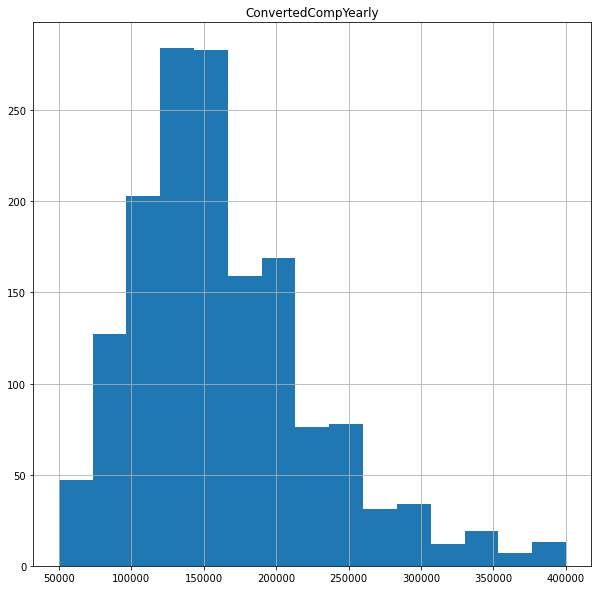

In [69]:
grp_mid.hist(column='ConvertedCompYearly',stacked=False, bins=15, figsize=(10, 10))

In [70]:
grp_vet.describe().T

,count,mean,std,min,25%,50%,75%,max
ConvertedCompYearly,3288.00,157686.93,66169.28,50000.00,110000.00,150000.00,190000.00,400000.00
YearsCode,3256.00,21.37,12.34,1.00,10.00,21.00,30.00,50.00
WorkExp,1147.00,29.41,6.90,21.00,24.00,27.00,33.00,50.00
n_cert,1002.00,2.04,1.08,1.00,1.00,2.00,3.00,7.00
n_lang,3281.00,5.21,2.65,1.00,3.00,5.00,7.00,23.00
n_db,2800.00,2.56,1.63,1.00,1.00,2.00,3.00,15.00
n_platform,2541.00,1.82,1.12,1.00,1.00,1.00,2.00,11.00
n_webframe,2416.00,2.99,1.88,1.00,2.00,3.00,4.00,15.00
n_msic,2004.00,1.95,1.52,1.00,1.00,1.00,2.00,12.00
n_vcs,3285.00,1.10,0.32,1.00,1.00,1.00,1.00,3.00


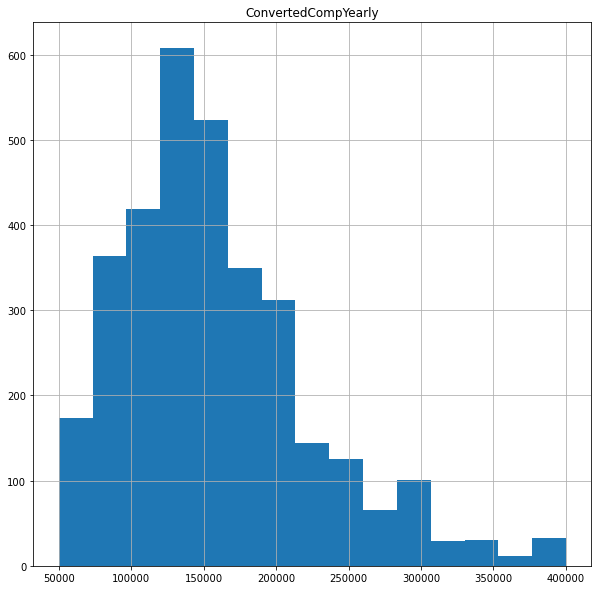

In [71]:
grp_vet.hist(column='ConvertedCompYearly',stacked=False, bins=15, figsize=(10, 10));

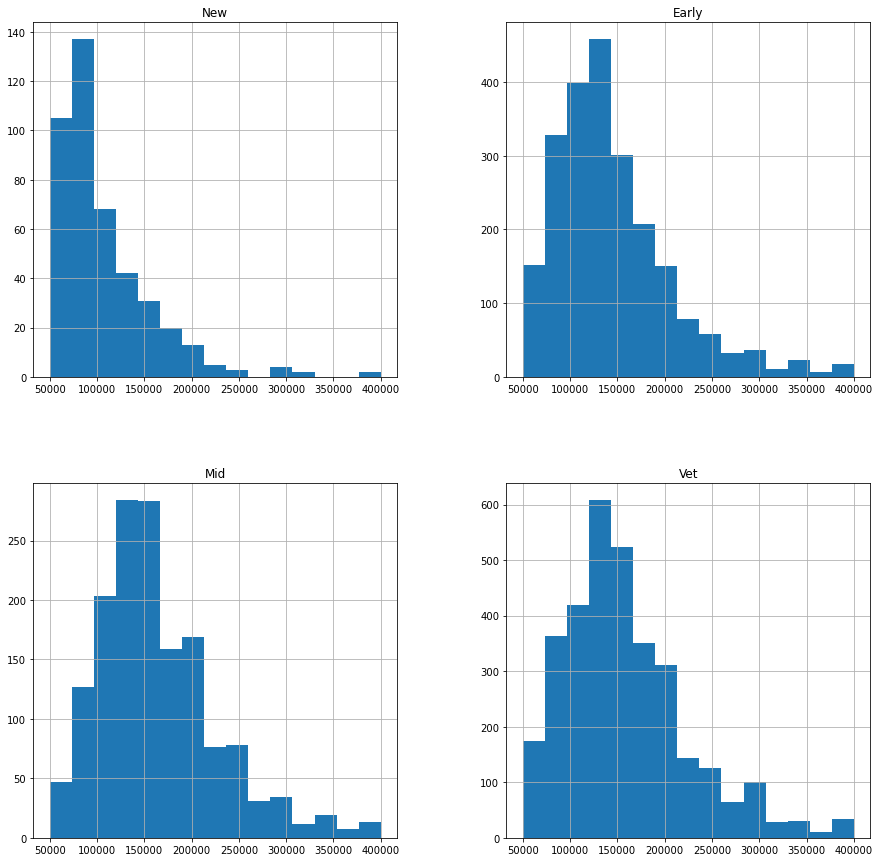

In [72]:
fig, axes = plt.subplots(ncols = 2, nrows=2, figsize =(15, 15)) 
ax1, ax2, ax3, ax4 = axes.flatten()

grp_new.hist(column='ConvertedCompYearly',stacked=False, bins=15, ax=ax1)
ax1.set_title('New') 

grp_early.hist(column='ConvertedCompYearly',stacked=False, bins=15, ax=ax2)
ax2.set_title('Early') 

grp_mid.hist(column='ConvertedCompYearly',stacked=False, bins=15, ax=ax3)
ax3.set_title('Mid') 

grp_vet.hist(column='ConvertedCompYearly',stacked=False, bins=15, ax=ax4)
ax4.set_title('Vet') ;

In [73]:
comp_order = ['new','early','mid','vet']

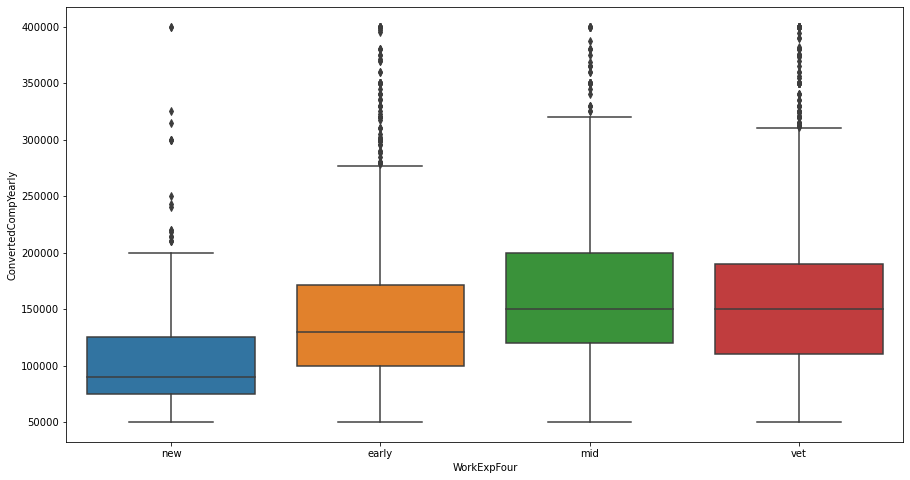

In [74]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_clean, x="WorkExpFour", y="ConvertedCompYearly", order=comp_order);

In [75]:
print("Grp new Average Compensation",round(grp_new["ConvertedCompYearly"].mean(),2))
print("Grp early Average Compensation",round(grp_early["ConvertedCompYearly"].mean(),2))
print("Grp mid Average Compensation",round(grp_mid["ConvertedCompYearly"].mean(),2))
print("Grp vet Average Compensation",round(grp_vet["ConvertedCompYearly"].mean(),2))
print("Grp new Median Compensation",round(grp_new["ConvertedCompYearly"].median(),2))
print("Grp early Median Compensation",round(grp_early["ConvertedCompYearly"].median(),2))
print("Grp mid Median Compensation",round(grp_mid["ConvertedCompYearly"].median(),2))
print("Grp vet Median Compensation",round(grp_vet["ConvertedCompYearly"].median(),2))

Grp new Average Compensation 106699.61
Grp early Average Compensation 144347.08
Grp mid Average Compensation 163096.92
Grp vet Average Compensation 157686.93
Grp new Median Compensation 90000.0
Grp early Median Compensation 130000.0
Grp mid Median Compensation 150000.0
Grp vet Median Compensation 150000.0


In [78]:
def tools2(df1,df2,df3,df4):
    tools_col = ['LearnCodeCoursesCert','LanguageHaveWorkedWith','DatabaseHaveWorkedWith','PlatformHaveWorkedWith',
                'WebframeHaveWorkedWith','MiscTechHaveWorkedWith','VersionControlSystem','OfficeStackSyncHaveWorkedWith','DevType']
    tools_counts = ['n_cert','n_lang','n_db','n_platform','n_webframe','n_msic','n_vcs','n_officestack','n_devtitles']
    for x in range(9):
        print("\nGrp new Average Number of {}: {}".format(tools_col[x],round(df1[tools_counts[x]].mean(),2)))
        print("Grp early Average Number of {}: {}".format(tools_col[x],round(df2[tools_counts[x]].mean(),2)))
        print("Grp mid Average Number of {}: {}".format(tools_col[x],round(df3[tools_counts[x]].mean(),2)))
        print("Grp vet Average Number of {}: {}\n".format(tools_col[x],round(df4[tools_counts[x]].mean(),2)))
        print("Grp new Median Number of {}: {}".format(tools_col[x],round(df1[tools_counts[x]].median(),2)))
        print("Grp early Median Number of {}: {}".format(tools_col[x],round(df2[tools_counts[x]].median(),2)))
        print("Grp mid Median Number of {}: {}".format(tools_col[x],round(df3[tools_counts[x]].median(),2)))
        print("Grp vet Median Number of {}: {}\n".format(tools_col[x],round(df4[tools_counts[x]].median(),2)))
        print("\nGrp new Top {}:".format(tools_col[x]))
        print(pd.Series([item for sublist in df1[df1[tools_col[x]].notnull()][tools_col[x]].str.split(pat=";") for item in sublist]).value_counts().head(8))
        print("\nGrp early Top {}:".format(tools_col[x]))
        print(pd.Series([item for sublist in df2[df2[tools_col[x]].notnull()][tools_col[x]].str.split(pat=";") for item in sublist]).value_counts().head(8))
        print("\nGrp mid Top {}:".format(tools_col[x]))
        print(pd.Series([item for sublist in df3[df3[tools_col[x]].notnull()][tools_col[x]].str.split(pat=";") for item in sublist]).value_counts().head(8))
        print("\nGrp vet Top {}:".format(tools_col[x]))
        print(pd.Series([item for sublist in df4[df4[tools_col[x]].notnull()][tools_col[x]].str.split(pat=";") for item in sublist]).value_counts().head(8))

In [79]:
tools2(grp_new,grp_early,grp_mid,grp_vet)


Grp new Average Number of LearnCodeCoursesCert: 2.06
Grp early Average Number of LearnCodeCoursesCert: 2.18
Grp mid Average Number of LearnCodeCoursesCert: 2.17
Grp vet Average Number of LearnCodeCoursesCert: 2.04

Grp new Median Number of LearnCodeCoursesCert: 2.0
Grp early Median Number of LearnCodeCoursesCert: 2.0
Grp mid Median Number of LearnCodeCoursesCert: 2.0
Grp vet Median Number of LearnCodeCoursesCert: 2.0


Grp new Top LearnCodeCoursesCert:
Udemy          107
Codecademy      73
Coursera        52
Other           41
Pluralsight     36
edX             30
Udacity         19
Skillsoft        1
dtype: int64

Grp early Top LearnCodeCoursesCert:
Udemy          465
Codecademy     328
Pluralsight    283
Coursera       242
Other          157
Udacity        136
edX            114
Skillsoft       14
dtype: int64

Grp mid Top LearnCodeCoursesCert:
Udemy          263
Pluralsight    220
Coursera       144
Codecademy     141
Other          109
Udacity         75
edX             63
Skillso